# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 577


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =  requests.get(city_url).json()
 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_k = city_weather["main"]["temp_max"]  # Temperature in Kelvin
        
        # Convert temperature from Kelvin to Celsius
        city_max_temp_c = city_max_temp_k - 273.15
        
        
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp_c,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bawku
Processing Record 2 of Set 1 | kristiansund
Processing Record 3 of Set 1 | bargara
City not found. Skipping...
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | princeville
Processing Record 7 of Set 1 | kapa'a
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | taiohae
City not found. Skipping...
Processing Record 14 of Set 1 | enewetak
Processing Record 15 of Set 1 | xai-xai
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | beloyarskiy
Processing Record 18 of Set 1 | altay
Processing Record 19 of Set 1 | khark
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | porto nov

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())


City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64


In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bawku,11.0616,-0.2417,33.39,38,99,4.45,GH,1712801542
1,kristiansund,63.1115,7.7320,3.36,87,40,3.09,NO,1712801542
2,mar del plata,-38.0023,-57.5575,14.49,70,75,8.05,AR,1712801524
3,port-aux-francais,-49.3500,70.2167,6.93,95,100,6.40,TF,1712801543
4,princeville,45.7668,-61.2985,-0.94,81,0,0.61,CA,1712801543


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bawku,11.0616,-0.2417,33.39,38,99,4.45,GH,1712801542
1,kristiansund,63.1115,7.7320,3.36,87,40,3.09,NO,1712801542
2,mar del plata,-38.0023,-57.5575,14.49,70,75,8.05,AR,1712801524
3,port-aux-francais,-49.3500,70.2167,6.93,95,100,6.40,TF,1712801543
4,princeville,45.7668,-61.2985,-0.94,81,0,0.61,CA,1712801543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

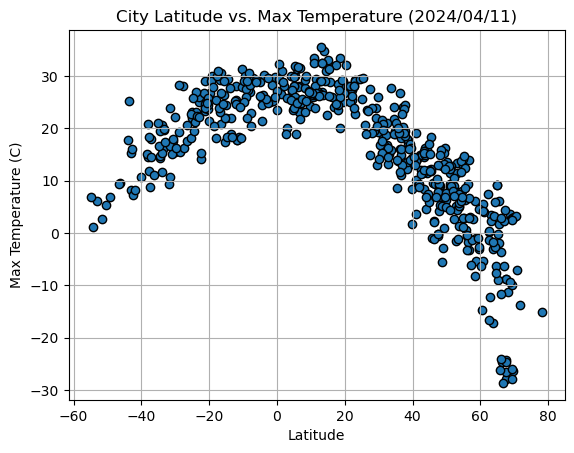

In [8]:
# Convert the date to the format yyyy/mm/dd
date = pd.to_datetime(city_data_df["Date"], unit="s").dt.strftime("%Y/%m/%d")

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature" + f" ({date.iloc[0]})")  # Use f-string to include date
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()



#### Latitude Vs. Humidity

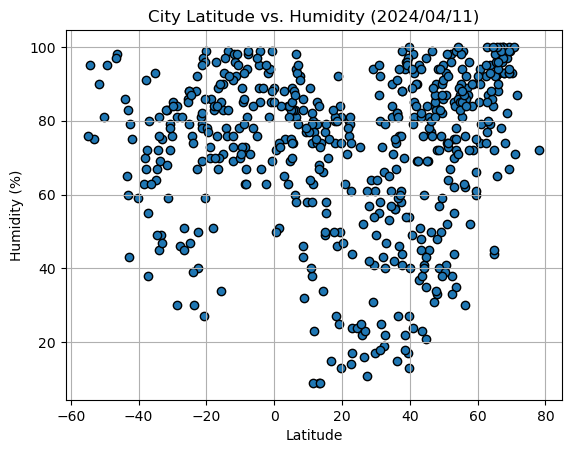

In [9]:
# Convert the date to the format yyyy/mm/dd
date = pd.to_datetime(city_data_df["Date"], unit="s").dt.strftime("%Y/%m/%d")
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity"+ f" ({date.iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

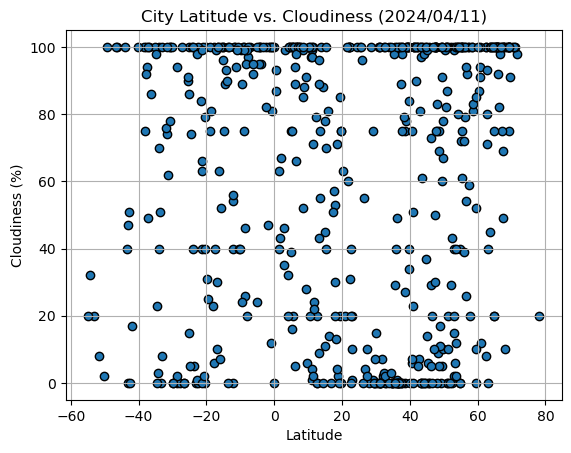

In [10]:
# Convert the date to the format yyyy/mm/dd
date = pd.to_datetime(city_data_df["Date"], unit="s").dt.strftime("%Y/%m/%d")
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness"+ f" ({date.iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

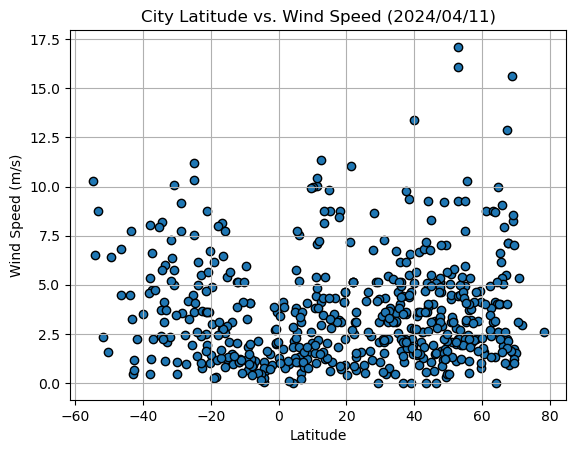

In [11]:
# Convert the date to the format yyyy/mm/dd
date = pd.to_datetime(city_data_df["Date"], unit="s").dt.strftime("%Y/%m/%d")
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed"+ f" ({date.iloc[0]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Set title and labels
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(title.split(" vs. ")[-1])
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bawku,11.0616,-0.2417,33.39,38,99,4.45,GH,1712801542
1,kristiansund,63.1115,7.7320,3.36,87,40,3.09,NO,1712801542
4,princeville,45.7668,-61.2985,-0.94,81,0,0.61,CA,1712801543
5,kapa'a,22.0752,-159.3190,27.99,80,100,5.14,US,1712801248
6,albany,42.6001,-73.9662,12.04,95,100,1.28,US,1712801412


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mar del plata,-38.0023,-57.5575,14.49,70,75,8.05,AR,1712801524
3,port-aux-francais,-49.3500,70.2167,6.93,95,100,6.40,TF,1712801543
8,edinburgh of the seven seas,-37.0676,-12.3116,17.86,80,100,2.25,SH,1712801543
9,grytviken,-54.2811,-36.5092,1.18,95,32,6.53,GS,1712801360
10,lebu,-37.6167,-73.6500,11.89,72,94,1.22,CL,1712801264


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8687022219300551


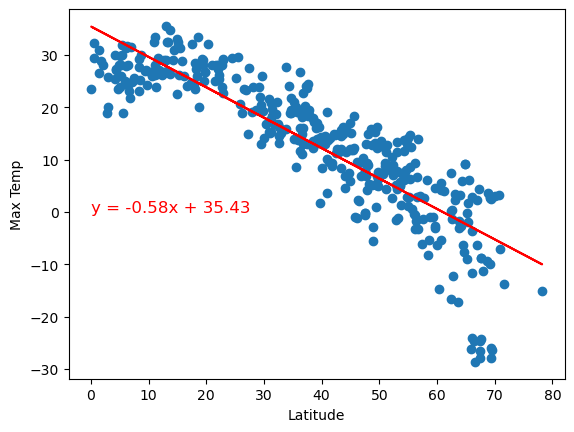

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add the equation text to the plot

    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    print("The r-value is:", rvalue)
    plt.text(text_coordinates[0], text_coordinates[1], equation_text, fontsize=12, color='red')
    
    # Set title and labels
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    
    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (0, 0))


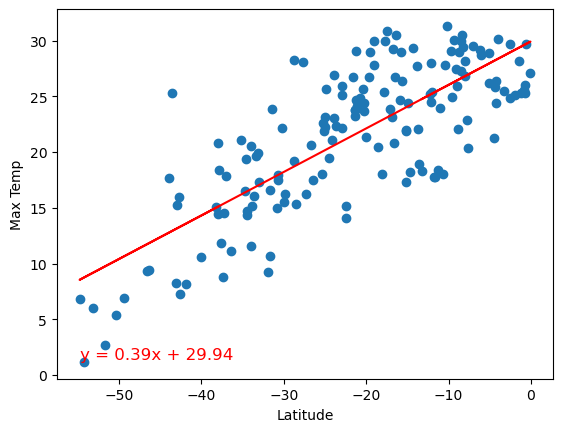

In [16]:
# Linear regression on Southern Hemisphere
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
   # Add the equation text to the plot
    # Add the equation text to the plot
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(x_values.min(), y_values.min(), equation_text, fontsize=12, color='red', ha='left', va='bottom')


    # Set title and labels
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    
    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (0, 0))


**Discussion about the linear relationship:** The Temperature versus Latitude linear regression plot demonstrates the relationship between temperature and latitude. In the Northern Hemisphere, there's typically a negative slope, indicating that as one moves away from the equator towards the North Pole, temperature tends to decrease. Conversely, in the Southern Hemisphere, the slope is usually positive, suggesting that as one moves away from the equator towards the South Pole, temperature decreases. The closer the data points align with the regression line, the stronger the linear relationship. Outliers may signify unique local climate conditions or measurement errors. The R-squared value indicates the proportion of variance in temperature explained by latitude, with a higher value suggesting a better fit. Overall, the plot helps in understanding temperature trends concerning latitude in both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

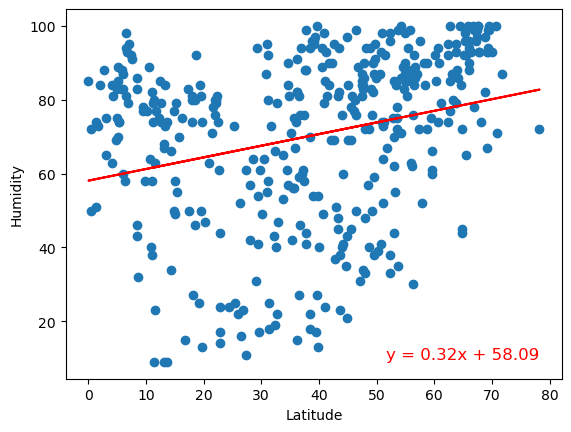

In [17]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add the equation text to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df["Lat"].max(), northern_hemi_df["Humidity"].min(), equation_text, fontsize=12, color='red', ha='right', va='bottom')

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
plt.show()


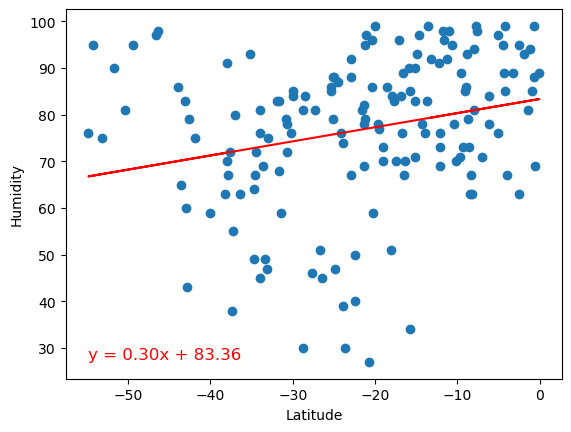

In [18]:
# Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add the equation text to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Humidity"].min(), equation_text, fontsize=12, color='red', ha='left', va='bottom')

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Show plot
plt.show()


**Discussion about the linear relationship:** The Humidity versus Latitude linear regression plot examines the relationship between humidity and latitude. In both the Northern and Southern Hemispheres, there appears to be no clear linear relationship between humidity and latitude, as indicated by the regression lines having very shallow slopes and low correlation coefficients (r-values). This suggests that latitude alone may not be a significant predictor of humidity. Other factors such as proximity to bodies of water, elevation, and local climate patterns likely play a more influential role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

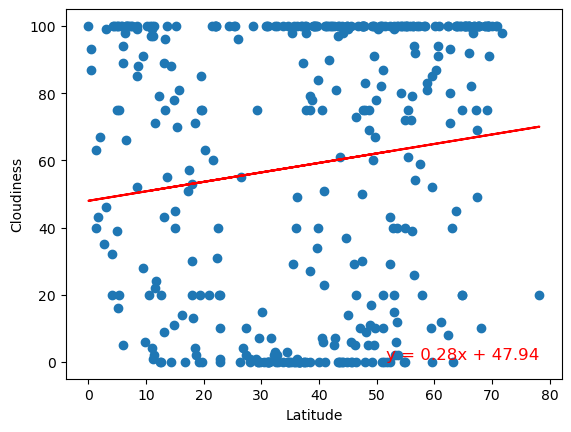

In [19]:
# Northern Hemisphere - Cloudiness vs. Latitude
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add the equation text to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df["Lat"].max(), northern_hemi_df["Cloudiness"].min(), equation_text, fontsize=12, color='red', ha='right', va='bottom')
# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Show plot
plt.show()


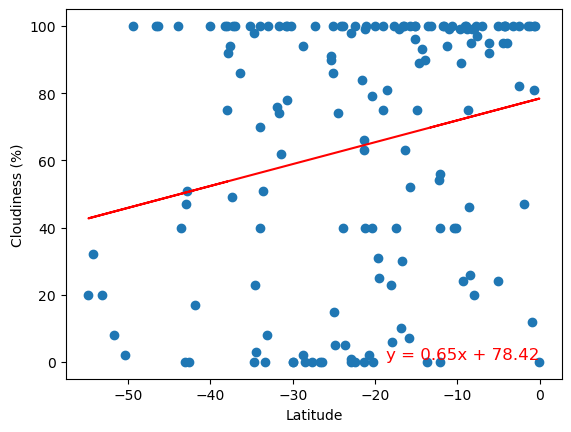

In [20]:
# Southern Hemisphere - Cloudiness vs. Latitude
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add the equation text to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df["Lat"].max(), southern_hemi_df["Cloudiness"].min(), equation_text, fontsize=12, color='red', ha='right', va='bottom')

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Show plot
plt.show()


**Discussion about the linear relationship:** The Cloudiness versus Latitude linear regression plot explores the association between cloudiness and latitude. Across both the Northern and Southern Hemispheres, there seems to be no evident linear correlation between cloudiness and latitude. This observation is supported by the nearly flat regression lines and low correlation coefficients (r-values), indicating that latitude may not be a reliable predictor of cloudiness. Various local and regional factors, such as atmospheric conditions and topography, likely contribute more significantly to cloud formation and distribution than latitude alone.

### Wind Speed vs. Latitude Linear Regression Plot

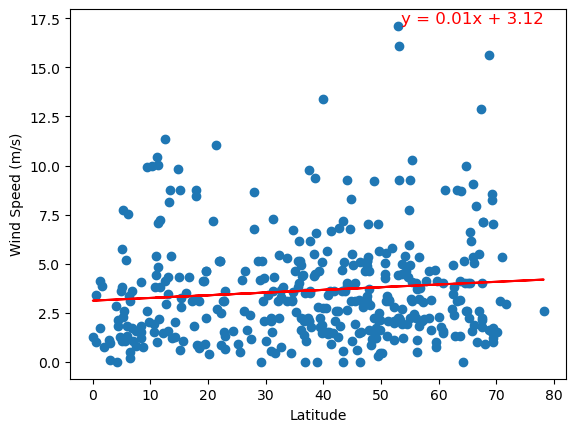

In [21]:
# Northern Hemisphere - Wind Speed vs. Latitude
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Plot regression line
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")

# Add the equation text to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(northern_hemi_df["Lat"].max(), northern_hemi_df["Wind Speed"].max(), equation_text, fontsize=12, color='red', ha='right', va='bottom')

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Show plot
plt.show()


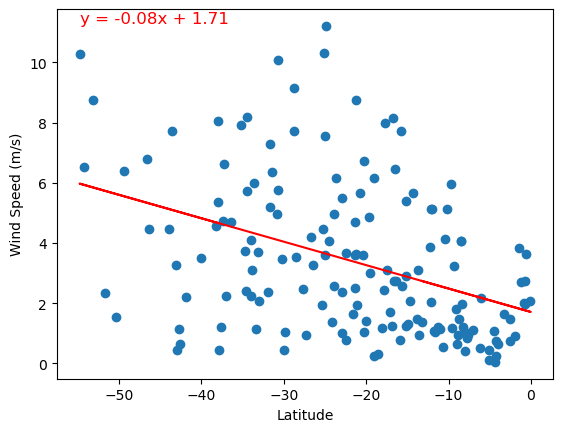

In [22]:
# Southern Hemisphere - Wind Speed vs. Latitude
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get regression values
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Plot regression line
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")

# Add the equation text to the plot
equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
plt.text(southern_hemi_df["Lat"].min(), southern_hemi_df["Wind Speed"].max(), equation_text, fontsize=12, color='red', ha='left', va='bottom')

# Set title and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Show plot
plt.show()


**Discussion about the linear relationship:** The Wind Speed versus Latitude linear regression plot examines the relationship between wind speed and latitude. In both the Northern and Southern Hemispheres, there appears to be no substantial linear correlation between wind speed and latitude. The nearly horizontal regression lines and low correlation coefficients (r-values) suggest that latitude is not a strong predictor of wind speed. Other factors, such as local geography, terrain, and atmospheric conditions, likely play a more significant role in determining wind speed variability than latitude alone.